In [ ]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import seaborn as sn
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#uploading dataset
!unzip gdrive/My\ Drive/ASP_jusan/ASP_jusan.zip> /dev/null
train_path='ASP_jysan/train_data.csv'
train_path= pathlib.Path(train_path)

replace ASP_jysan/test_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
train_df= pd.read_csv(train_path)


In [ ]:
#creating dataframe 
train_df=train_df.drop('transactions_amount_9',axis=1)
train_df=train_df.drop('transactions_count_9',axis=1)
train_df=train_df.drop('transactions_amount_10',axis=1)
train_df=train_df.drop('transactions_count_10',axis=1)
train_df=train_df.drop('transfers_amount_in_8',axis=1)
train_df=train_df.drop('transfers_count_in_8',axis=1)
train_df=train_df.drop('transfers_amount_out_8',axis=1)
train_df=train_df.drop('transfers_count_out_8',axis=1)
train_df.head()
train_df=train_df.replace(np.nan,0)

,client_id,cato_code,gender,country,citizenship,age_days,client_days,opsos_code,phone_digits,max_dup,...,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
0,2152686,17.0,1.0,0.0,0.0,11643.0,130.0,9.0,5.0,1.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
1,1712777,2.0,0.0,0.0,0.0,18095.0,994.0,5.0,5.0,1.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
2,458915,0.0,0.0,0.0,0.0,7955.0,1144.0,7.0,5.0,1.0,...,0.000000,0.000000,0.00000,0.033580,0.000000,0.037251,0.033580,0.03358,0.000000,0
3,530220,0.0,0.0,0.0,0.0,22580.0,847.0,0.0,6.0,1.0,...,0.033579,0.145198,0.03358,0.033581,0.036560,0.115086,0.033581,0.03358,0.092161,0
4,1103654,12.0,0.0,0.0,0.0,13107.0,547.0,12.0,6.0,1.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941526,1244050,6.0,1.0,0.0,0.0,11813.0,462.0,8.0,4.0,1.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
941527,1142266,12.0,0.0,0.0,0.0,11573.0,787.0,8.0,3.0,2.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
941528,1327217,9.0,1.0,0.0,0.0,11268.0,455.0,11.0,4.0,1.0,...,0.000000,0.000000,0.00000,0.033580,0.000000,0.000000,0.000000,0.03358,0.000000,0
941529,1634056,5.0,1.0,0.0,0.0,17215.0,400.0,10.0,4.0,1.0,...,0.033579,0.038325,0.03358,0.033580,0.038471,0.041267,0.033580,0.03358,0.037430,0


In [ ]:
assert not np.any(np.isnan(train_df)), 'nan present'
print('not any nan')

TypeError: ignored

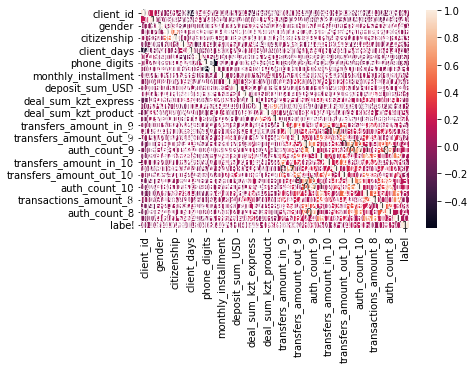

In [ ]:
corr_matrix=train_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
temp=[]
temp_2=[]
temp_3=[]
corr_keys=corr_matrix.keys()
for ii in range (33):
  corr_temp=corr_matrix[corr_keys[ii]]
  for i in range (33):
    if corr_temp[i]>=0.5 and ii!=i:
      temp.append(corr_temp.keys()[i])
      temp_2.append(corr_temp[i])
      temp_3.append(corr_temp.keys()[ii])

In [ ]:
train_df=train_df.drop('salary_9',axis=1)
train_df=train_df.drop('country',axis=1)

In [ ]:
train_df.head()

,client_id,cato_code,gender,citizenship,age_days,client_days,opsos_code,phone_digits,max_dup,monthly_installment,...,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
0,2152686,17.0,1.0,0.0,11643.0,130.0,9.0,5.0,1.0,0.080061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1712777,2.0,NaN,0.0,18095.0,994.0,5.0,5.0,1.0,0.033579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,458915,NaN,0.0,0.0,7955.0,1144.0,7.0,5.0,1.0,NaN,...,NaN,NaN,NaN,0.033580,NaN,0.037251,0.033580,0.03358,NaN,0
3,530220,NaN,0.0,0.0,22580.0,847.0,0.0,6.0,1.0,0.047791,...,0.033579,0.145198,0.03358,0.033581,0.03656,0.115086,0.033581,0.03358,0.092161,0
4,1103654,12.0,0.0,0.0,13107.0,547.0,12.0,6.0,1.0,0.057000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
